In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



#  Camera model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Two models/combined/training/train/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Two models/combined/testing/test/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Two models/combined/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Two models/combined/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape


# Model 1(camera)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
#output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)


# for camera model
dense_camera=Dense(8,activation='softmax')(dense1)
output_camera = dense_camera

# camera model

model_camera = Model(inputs= inp1, outputs = output_camera)
model_camera.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history= model_camera.fit(X1_train,Y1_train, batch_size=128,epochs=15,validation_data=(X1_test,Y1_test))



Epoch 1/15
16/16 [==============================] - 20s 1s/step - loss: 2.0776 - accuracy: 0.1402 - val_loss: 2.0567 - val_accuracy: 0.1325
Epoch 2/15
16/16 [==============================] - 21s 1s/step - loss: 2.0464 - accuracy: 0.1347 - val_loss: 1.9959 - val_accuracy: 0.1525
Epoch 3/15
16/16 [==============================] - 21s 1s/step - loss: 1.9933 - accuracy: 0.1594 - val_loss: 1.9593 - val_accuracy: 0.1500
Epoch 4/15
16/16 [==============================] - 21s 1s/step - loss: 1.9268 - accuracy: 0.1613 - val_loss: 1.8854 - val_accuracy: 0.1725
Epoch 5/15
16/16 [==============================] - 21s 1s/step - loss: 1.8322 - accuracy: 0.2409 - val_loss: 1.8452 - val_accuracy: 0.2100
Epoch 6/15
16/16 [==============================] - 22s 1s/step - loss: 1.7672 - accuracy: 0.2761 - val_loss: 1.7380 - val_accuracy: 0.3050
Epoch 7/15
16/16 [==============================] - 22s 1s/step - loss: 1.6867 - accuracy: 0.3516 - val_loss: 1.6541 - val_accuracy: 0.3700
Epoch 8/15
16/16 [==

In [2]:

#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_camera.evaluate(X1_test,Y1_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

4/4 [==============================] - 1s 257ms/step - loss: 1.3340 - accuracy: 0.4825
[INFO] Accuracy: 48.25%
[INFO] Loss: 1.3339576721191406
Time:  0:00:01.253533


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


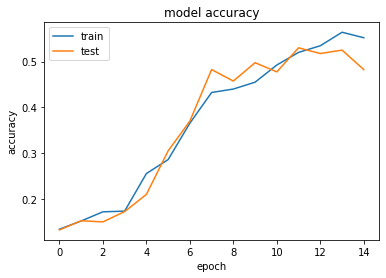

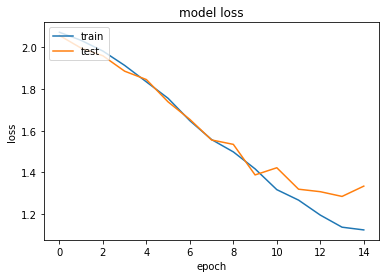

In [3]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Input image: chair_bottle1_IHS.jpg

probality of chair_bottle:  10.79145222902298

probality of plate_bottle:  3.320378065109253

probality of spectacle_laptop:  5.63836395740509

probality of table_bottle:  56.362754106521606

probality of table_chair:  0.11997123947367072

probality of table_laptop:  0.488000875338912

probality of table_plate:  0.2481367439031601

probality of table_spectacle:  23.03094118833542


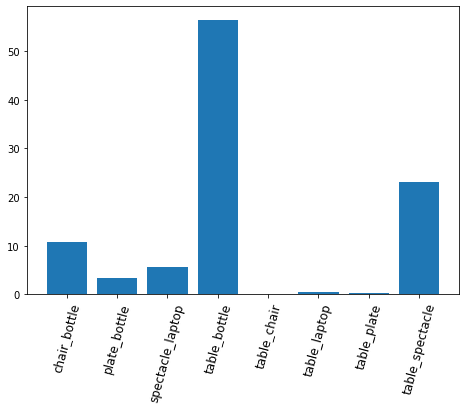

__________________________________________________________________
Input image: plate_bottle0_IHS.jpg

probality of chair_bottle:  11.665481328964233

probality of plate_bottle:  4.695865884423256

probality of spectacle_laptop:  8.07456150650978

probality of table_bottle:  33.08822810649872

probality of table_chair:  0.6551781203597784

probality of table_laptop:  1.8770050257444382

probality of table_plate:  1.1119726113975048

probality of table_spectacle:  38.83170485496521


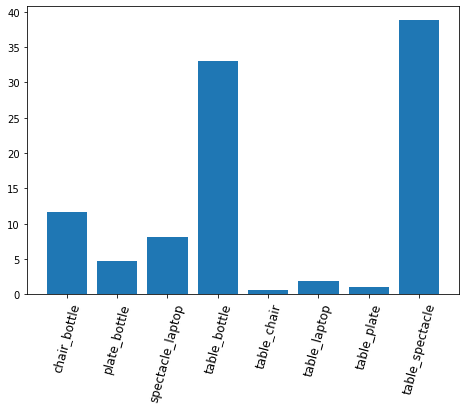

__________________________________________________________________
Input image: table_specs28_IHS.jpg

probality of chair_bottle:  2.02981848269701

probality of plate_bottle:  0.3957684151828289

probality of spectacle_laptop:  4.300300404429436

probality of table_bottle:  0.5984256509691477

probality of table_chair:  9.370982646942139

probality of table_laptop:  12.011707574129105

probality of table_plate:  1.957172155380249

probality of table_spectacle:  69.33582425117493


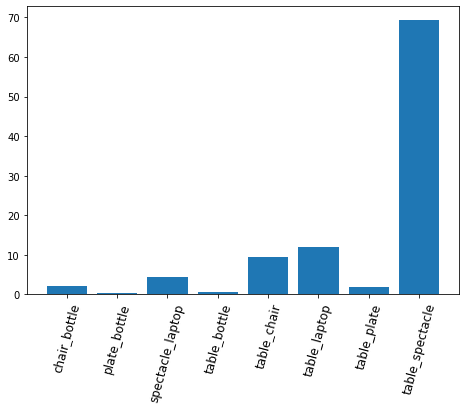

__________________________________________________________________
Input image: table_laptop10_IHS.jpg

probality of chair_bottle:  3.2210804522037506

probality of plate_bottle:  2.188112586736679

probality of spectacle_laptop:  2.4595441296696663

probality of table_bottle:  0.30805987771600485

probality of table_chair:  8.190245926380157

probality of table_laptop:  27.861300110816956

probality of table_plate:  23.720449209213257

probality of table_spectacle:  32.0512056350708


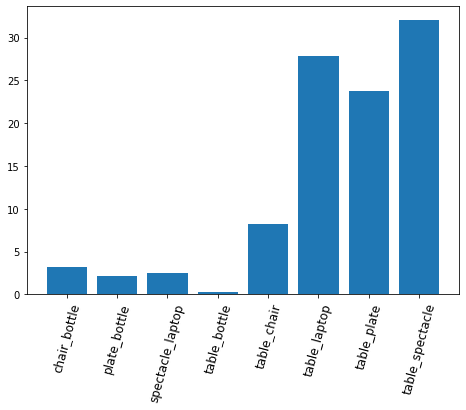

__________________________________________________________________
Input image: table_bottle5_IHS.jpg

probality of chair_bottle:  9.124559909105301

probality of plate_bottle:  1.8504083156585693

probality of spectacle_laptop:  8.47906544804573

probality of table_bottle:  28.5776287317276

probality of table_chair:  0.7886002771556377

probality of table_laptop:  1.4648393727838993

probality of table_plate:  0.579053582623601

probality of table_spectacle:  49.13583993911743


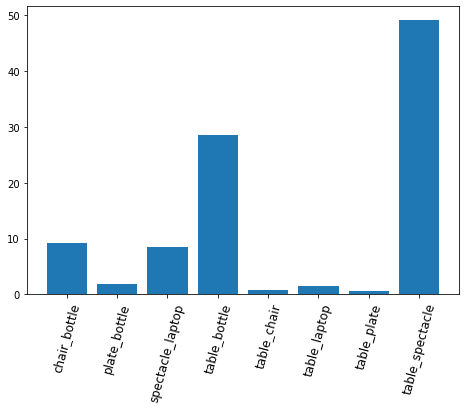

__________________________________________________________________
Input image: table_plate4_IHS.jpg

probality of chair_bottle:  2.2115716710686684

probality of plate_bottle:  4.634631052613258

probality of spectacle_laptop:  1.7181124538183212

probality of table_bottle:  0.9168704971671104

probality of table_chair:  3.4903883934020996

probality of table_laptop:  16.26329869031906

probality of table_plate:  11.49645447731018

probality of table_spectacle:  59.26867723464966


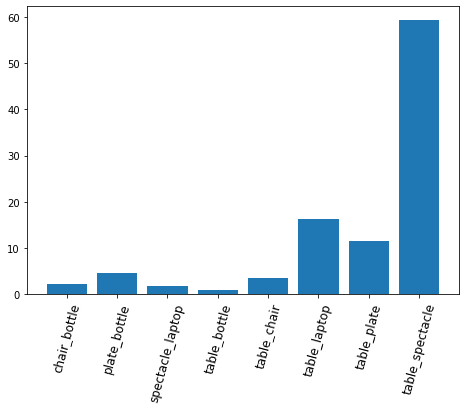

__________________________________________________________________
Input image: table_chair15_IHS.jpg

probality of chair_bottle:  0.38896200712770224

probality of plate_bottle:  0.016225437866523862

probality of spectacle_laptop:  2.1810896694660187

probality of table_bottle:  0.04749484942294657

probality of table_chair:  7.236035168170929

probality of table_laptop:  7.648842036724091

probality of table_plate:  0.21842564456164837

probality of table_spectacle:  82.26292729377747


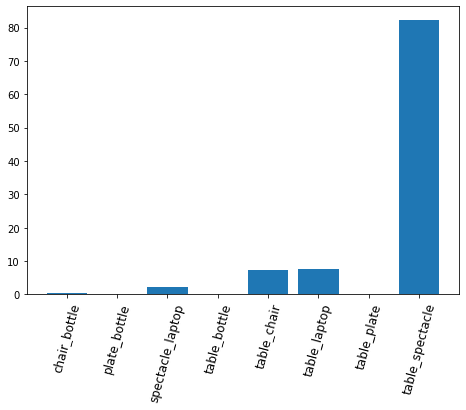

__________________________________________________________________
Input image: specs_laptop25_IHS.jpg

probality of chair_bottle:  1.2195616960525513

probality of plate_bottle:  0.01149718591477722

probality of spectacle_laptop:  14.359667897224426

probality of table_bottle:  0.4354454576969147

probality of table_chair:  9.274092316627502

probality of table_laptop:  5.595869198441505

probality of table_plate:  0.08912650519050658

probality of table_spectacle:  69.01473999023438


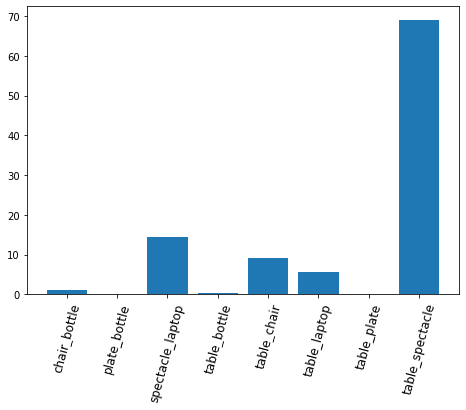

__________________________________________________________________


In [4]:
# make a prediction for a new thermal image.
# importing the required module
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ListPic = {'chair_bottle1_IHS.jpg','plate_bottle0_IHS.jpg','specs_laptop25_IHS.jpg','table_bottle5_IHS.jpg',
          'table_chair15_IHS.jpg','table_laptop10_IHS.jpg','table_plate4_IHS.jpg','table_specs28_IHS.jpg'}



for item in ListPic:
 # load the image thermal
 img1 = load_img(item, target_size=(32, 32))

 # convert to array
 img1 = img_to_array(img1)

 # reshape into a single sample with 3 channels
 img1 = img1.reshape(1,32, 32, 3)

 # prepare pixel data
 img1 = img1.astype('float32')
 img1 = img1 / 255.0

 # prediction od data
 result = model_camera.predict(img1)
 
 print('Input image:',item)
 #print(result)
 print('')
 Bed = result[0][0]*100
 print("probality of chair_bottle: ", Bed)
 print()
 Bottle = result[0][1]*100
 print("probality of plate_bottle: ", Bottle)
 print()
 Chair = result[0][2]*100
 print("probality of spectacle_laptop: ", result[0][2]*100)
 print()
 Laptop = result[0][3]*100
 print("probality of table_bottle: ", result[0][3]*100)
 print()
 Plate = result[0][4]*100
 print("probality of table_chair: ", result[0][4]*100)
 print()
 Sofa = result[0][5]*100   
 print("probality of table_laptop: ", result[0][5]*100)
 print()
 Spectacle = result[0][6]*100
 print("probality of table_plate: ", result[0][6]*100)
 print()
 Table = result[0][7]*100   
 print("probality of table_spectacle: ", result[0][7]*100)
    

  
 fig = plt.figure()
 plt.rcParams['xtick.labelsize'] = 'large' 
 ax = fig.add_axes([0,0,1,1]) 
 

 # x axis values
 x = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
 # corresponding y axis values
 y = [Bed,Bottle,Chair,Laptop,Plate,Sofa,Spectacle,Table]

 ax.bar(x,y)
 plt.xticks(rotation=75)
 plt.show()   
    
 print("__________________________________________________________________")

 
 
    
 

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools  


preds = np.round(model_camera.predict([X1_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['chair_bottle','plate_bottle','spectacle_laptop','table_bottle','table_chair','table_laptop','table_plate', 'table_spectacle']
classification_metrics = metrics.classification_report(Y1_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3,4,5,6,7]
cf_matrix = confusion_matrix(Y1_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
                  precision    recall  f1-score   support

    chair_bottle       1.00      0.04      0.08        50
    plate_bottle       0.92      0.90      0.91        50
spectacle_laptop       0.40      0.20      0.27        50
    table_bottle       0.61      0.46      0.52        50
     table_chair       0.75      0.06      0.11        50
    table_laptop       0.33      0.26      0.29        50
     table_plate       0.73      0.38      0.50        50
 table_spectacle       0.37      0.52      0.43        50

       micro avg       0.56      0.35      0.43       400
       macro avg       0.64      0.35      0.39       400
    weighted avg       0.64      0.35      0.39       400
     samples avg       0.35      0.35      0.35       400

Confusion Matrix
[[31  2  0 14  0  0  1  2]
 [ 4 45  0  1  0  0  0  0]
 [14  0 10  0  0  9  3 14]
 [25  0  0 23  0  0  1  1]
 [20  0  2  0  3 12  0 13]
 [16  0  9  0  0 13  1 11]
 [22  2  0  0  0  4 19  3]
 [16  0  4  0  

C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Normalized confusion matrix


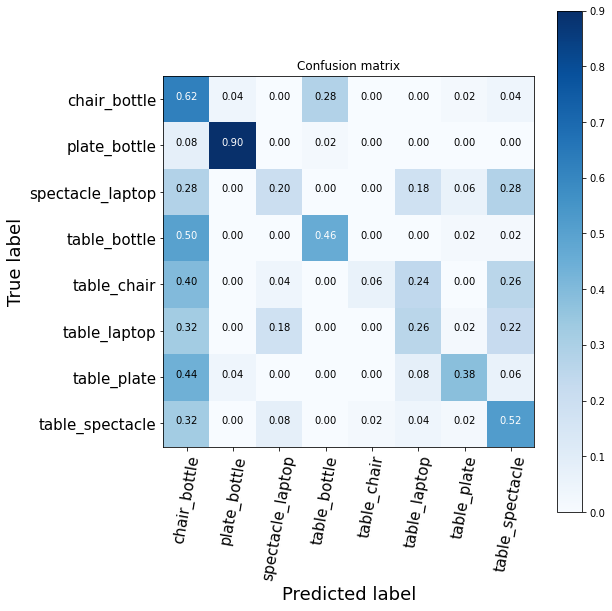

In [6]:
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(Y1_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
   plt.figure(figsize=(8, 8))
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
    
    # Labels, title and ticks
   label_font = {'size':'18'}  # Adjust to fit
   plt.xlabel('Predicted label', fontdict=label_font);
   plt.ylabel('True label', fontdict=label_font);
   plt.tick_params(labelsize = 15) 
   plt.xticks(rotation=80)   
    
    
plot_confusion_matrix(confusion_matrix, fusion , normalize= True) 